In [1]:
import pandas as pd

In [35]:
habr_df = pd.read_pickle('../Parsing/data/habr100.pkl')

In [3]:
df.head()

,post_idx,author,nickname,author_title,author_karma,author_rating,title,date,hubs,tags,post_rating,times_saved,views,comment_count,raw_post_text,clean_text
0,373265,Анастасия Краснянская,krasandm,Пользователь,40.2,0.0,Как открытые офисы влияют на работу высокоэффе...,2017-03-16 16:26:00,"[Офисы IT-компаний, IT-компании]","[высокоэффективные сотрудники, open space]",27.0,59.0,42600.0,137.0,\n\r\nПредставьте себе работу в открытом офисе...,Представьте себе работу в открытом офисе В ...
1,373263,None,gumanitarii,Пользователь,6.5,0.0,Mpow Thor: проводные беспроводные наушники на ...,2017-03-16 11:23:00,"[Блог компании Medgadgets, Гаджеты]",[Mpow Thor],4.0,9.0,9200.0,10.0,"Mpow Thor — вроде бы обычная гарнитура, сделан...",Mpow Thor — вроде бы обычная гарнитура сделанн...
2,373261,None,AntoBro,Пользователь,16.7,0.0,Проект «Адам»-«Man Very High»? Миссия не выпол...,2017-03-15 15:12:00,"[Профессиональная литература, Научно-популярно...","[Гагарин, НАСА, первый человек в космосе, день...",14.0,26.0,16600.0,46.0,"\n\nКосмос — удивительное место, полное загад...",Космос — удивительное место полное загадок ...
3,373255,None,randall,Пользователь,94.2,0.0,"Как затруднить идентификацию, обмануть видеоан...",2017-03-14 12:35:00,"[Блог компании Ivideon, Дизайн, Киберпанк, Вид...","[видеонаблюдение, видеоаналитика, распознавани...",27.0,101.0,75500.0,78.0,"\nЭтот человек, которого мы будем называть Фре...",Этот человек которого мы будем называть Фред ...
4,373253,Матвеев Сергей,Feryo,Пользователь,NaN,NaN,Неокоммунизм. Теоретическое обоснование,2017-03-14 08:30:00,[Будущее здесь],"[неокоммунизм, коммунизм, общество будущего]",1.0,49.0,14100.0,500.0,Существующий капитализм — это не оптимальная ф...,Существующий капитализм — это не оптимальная ф...


# 1 text

In [7]:
test_text = df.iloc[105,15]

In [17]:
from collections import Counter
chrs = list(test_text.lower())
letter_counts = Counter(chrs)
df = pd.DataFrame.from_dict(letter_counts, orient='index')

<AxesSubplot:>

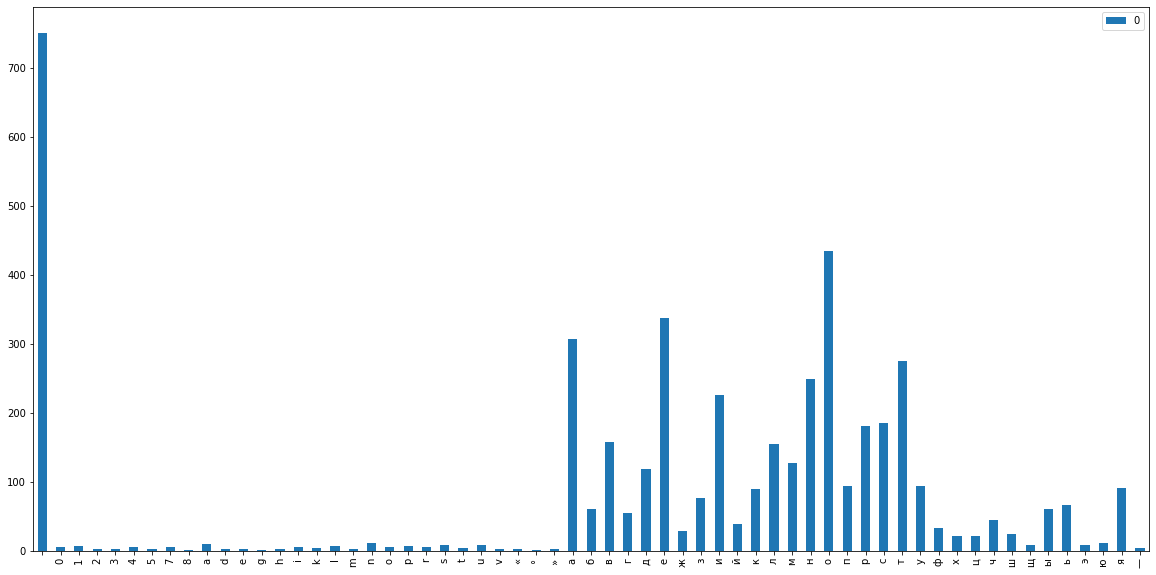

In [18]:
df.sort_index().plot(kind='bar',figsize = (20,10))

# Many 

In [70]:
test_text = [text for text in habr_df.clean_text[:10000]]

In [71]:
Text = "".join(test_text)

In [72]:
chrs = list(Text.lower())
letter_counts = Counter(chrs)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df = df.sort_index()

In [65]:
import numpy as np

<AxesSubplot:>

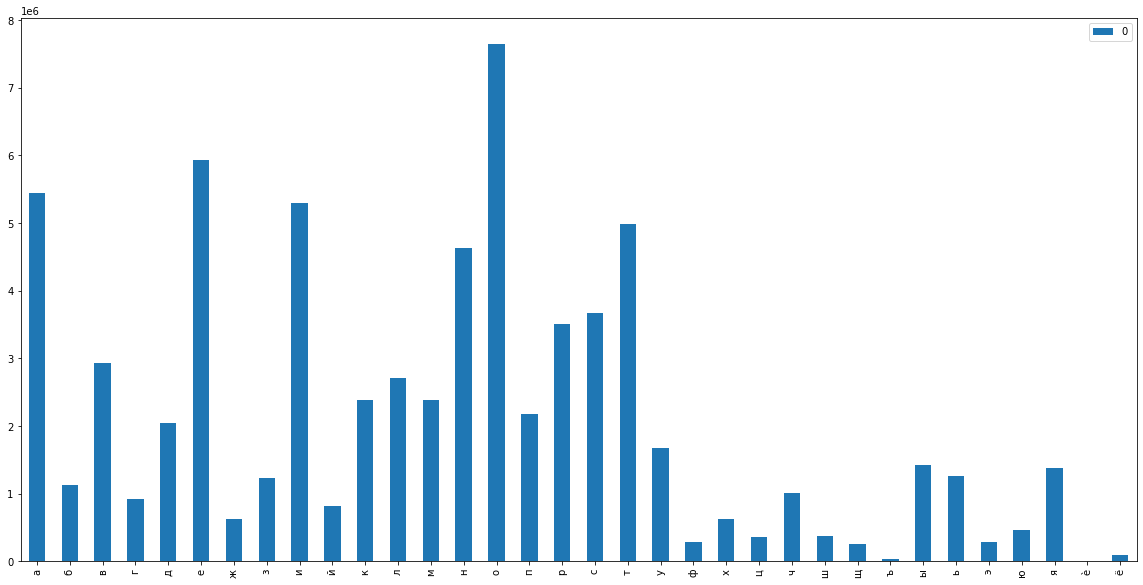

In [73]:
df[np.logical_and(df.index >= 'а',df.index <= 'ё')].plot(kind='bar',figsize = (20,10))

# Features

In [74]:
test_df = habr_df[:100]

In [ ]:
habr_df['text_len'] = habr_df['clean_text'].str.len()
habr_df = habr_df.drop('raw_post_text',axis = 1)

In [97]:
habr_df['date'] = habr_df['date'].astype('datetime64[ns]')
habr_df['year'] = habr_df['date'].dt.year
habr_df['day'] = habr_df['date'].dt.day
habr_df['weekday'] = habr_df['date'].dt.weekday
habr_df['hour'] = habr_df['date'].dt.hour
habr_df['month'] = habr_df['date'].dt.month

,post_idx,author,nickname,author_title,author_karma,author_rating,title,date,hubs,tags,post_rating,times_saved,views,comment_count,clean_text,text_len
0,373265,Анастасия Краснянская,krasandm,Пользователь,40.2,0.0,Как открытые офисы влияют на работу высокоэффе...,2017-03-16 16:26:00,"[Офисы IT-компаний, IT-компании]","[высокоэффективные сотрудники, open space]",27.0,59.0,42600.0,137.0,Представьте себе работу в открытом офисе В ...,6083
1,373263,None,gumanitarii,Пользователь,6.5,0.0,Mpow Thor: проводные беспроводные наушники на ...,2017-03-16 11:23:00,"[Блог компании Medgadgets, Гаджеты]",[Mpow Thor],4.0,9.0,9200.0,10.0,Mpow Thor — вроде бы обычная гарнитура сделанн...,2771
2,373261,None,AntoBro,Пользователь,16.7,0.0,Проект «Адам»-«Man Very High»? Миссия не выпол...,2017-03-15 15:12:00,"[Профессиональная литература, Научно-популярно...","[Гагарин, НАСА, первый человек в космосе, день...",14.0,26.0,16600.0,46.0,Космос — удивительное место полное загадок ...,10444
3,373255,None,randall,Пользователь,94.2,0.0,"Как затруднить идентификацию, обмануть видеоан...",2017-03-14 12:35:00,"[Блог компании Ivideon, Дизайн, Киберпанк, Вид...","[видеонаблюдение, видеоаналитика, распознавани...",27.0,101.0,75500.0,78.0,Этот человек которого мы будем называть Фред ...,8980
4,373253,Матвеев Сергей,Feryo,Пользователь,NaN,NaN,Неокоммунизм. Теоретическое обоснование,2017-03-14 08:30:00,[Будущее здесь],"[неокоммунизм, коммунизм, общество будущего]",1.0,49.0,14100.0,500.0,Существующий капитализм — это не оптимальная ф...,46789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,373037,Максим Агаджанов,marks,Редактор Habrahabr,260.5,2.6,Intel представила компьютер размером с кредитку,2017-01-06 13:10:00,"[Гаджеты, Компьютерное железо, Настольные комп...","[Compute Card, компьютеры, Intel, intel stick]",23.0,28.0,39400.0,82.0,Корпорация Intel довольно давно выпускает м...,5540
96,373035,Максим Агаджанов,marks,Редактор Habrahabr,260.5,2.6,Астрономы уточнили местоположение источника по...,2017-01-06 09:03:00,"[Космонавтика, Астрономия]","[радиовспышки, аресибо, радиосигналы, вселенная]",23.0,18.0,27600.0,31.0,На Geektimes регулярно публикуются материал...,5470
97,373033,Роман,xRange,Пользователь,13.0,0.0,Веб-камера в стиле стимпанк,2017-01-05 04:06:00,"[Гаджеты, Компьютерное железо, Краудсорсинг, D...","[стимпанк, webcam, веб-камера, steampunk, t-fl...",47.0,75.0,29300.0,105.0,В прошлой статье мы писали о том как разрабаты...,4691
98,373029,Осман Мазинов,Jmann,Software Engineer,12.0,0.0,Простой контроллер освещения,2017-01-01 12:47:00,[DIY или Сделай сам],"[Attiny13, C, PCB, DIY, mcu]",32.0,152.0,35800.0,83.0,Как ни странно на разработку этого устройства ...,5675


In [87]:
time = test_df['date'].astype('datetime64[ns]')

In [115]:
time.dt.to_pydatetime()

array([datetime.datetime(2017, 3, 16, 16, 26),
       datetime.datetime(2017, 3, 16, 11, 23),
       datetime.datetime(2017, 3, 15, 15, 12),
       datetime.datetime(2017, 3, 14, 12, 35),
       datetime.datetime(2017, 3, 14, 8, 30),
       datetime.datetime(2017, 4, 18, 6, 4),
       datetime.datetime(2017, 3, 13, 6, 2),
       datetime.datetime(2017, 3, 10, 9, 10),
       datetime.datetime(2017, 3, 9, 14, 25),
       datetime.datetime(2017, 3, 8, 16, 36),
       datetime.datetime(2017, 3, 8, 2, 31),
       datetime.datetime(2017, 3, 7, 17, 21),
       datetime.datetime(2017, 3, 9, 4, 8),
       datetime.datetime(2017, 3, 6, 13, 13),
       datetime.datetime(2017, 3, 5, 23, 11),
       datetime.datetime(2017, 3, 4, 9, 12),
       datetime.datetime(2017, 3, 3, 11, 48),
       datetime.datetime(2017, 3, 3, 9, 41),
       datetime.datetime(2017, 3, 2, 8, 47),
       datetime.datetime(2017, 2, 28, 19, 5),
       datetime.datetime(2017, 2, 28, 7, 58),
       datetime.datetime(2017, 2, 27, 